<a href="https://colab.research.google.com/github/WesleyKhoiVo/DeepLearning/blob/main/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load MNIST dataset
# MNIST dataset has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False, parser='auto')

In [5]:
#Explore the first image in MNIST dataset
mnist['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

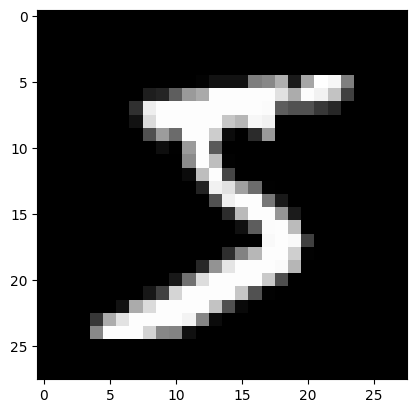

In [6]:
import matplotlib.pyplot as plt
plt.imshow(mnist.data[0].reshape(28,28), cmap='gray')

In [7]:
mnist.target[0]

'5'

In [8]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)
train_lbl[0:10]
train_img.shape

(60000, 784)

In [9]:
from tensorflow.keras.utils import to_categorical
train_onehot_lbl = to_categorical(train_lbl,num_classes=10)
test_onehot_lbl = to_categorical(test_lbl,num_classes=10)
train_onehot_lbl[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

input_layer = Input(shape=(784,))
hidden_layer = Dense(30,activation="sigmoid")(input_layer)
dense_layer = Dense(10, activation="softmax")(hidden_layer)

model = Model(inputs=input_layer, outputs=dense_layer)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

model.fit(train_img,train_onehot_lbl,validation_data=(test_img,test_onehot_lbl), epochs= 20, batch_size=20)

Epoch 1/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.7737 - accuracy: 0.7841 - val_loss: 0.5275 - val_accuracy: 0.8482
Epoch 2/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4641 - accuracy: 0.8614 - val_loss: 0.4450 - val_accuracy: 0.8694
Epoch 3/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4183 - accuracy: 0.8749 - val_loss: 0.4226 - val_accuracy: 0.8690
Epoch 4/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4046 - accuracy: 0.8774 - val_loss: 0.4432 - val_accuracy: 0.8580
Epoch 5/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4021 - accuracy: 0.8754 - val_loss: 0.3858 - val_accuracy: 0.8831
Epoch 6/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3659 - accuracy: 0.8888 - val_loss: 0.3939 - val_accuracy: 0.8809
Epoch 7/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3848 - accuracy: 0.8798 - val_loss: 0.4184 - val_accuracy

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

input_layer = Input(shape=(784,))
dense_layer1 = Dense(100,activation="sigmoid")(input_layer) 
dense_layer2 = Dense(80,activation="sigmoid")(dense_layer1)
dense_layer3 = Dense(50,activation="sigmoid")(dense_layer2)
dense_layer4 = Dense(10, activation="softmax")(dense_layer3)  

model = Model(inputs=input_layer, outputs=dense_layer4)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=["accuracy"])

model.summary()

#model.fit(train_img,train_onehot_lbl,validation_data=(test_img,test_onehot_lbl), epochs= 5, batch_size=10)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 80)                8080      
                                                                 
 dense_4 (Dense)             (None, 50)                4050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 91,140
Trainable params: 91,140
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.predict(test_img[0:2])

1/1 [==============================] - 0s 105ms/step


array([[0.03871461, 0.09127783, 0.0966564 , 0.06257275, 0.13741416,
        0.29780576, 0.0359331 , 0.0535029 , 0.07503361, 0.11108892],
       [0.04120574, 0.09721867, 0.0987242 , 0.0629988 , 0.14555232,
        0.28177124, 0.03788112, 0.05586111, 0.07330831, 0.10547843]],
      dtype=float32)